In [3]:
from Movies_Finances_Project import all_movie
import numpy as np
import pandas as pd 
from openpyxl.workbook import workbook
data = np.array(all_movie)


In [ ]:
data = np.array(all_movie)


In [115]:
df = pd.DataFrame(data, columns=["Release_date","Movie","Budget","domestic_gross","worldwide_gross", "source", "director","production_company","production_country","production_method","genre","language","best_performed"])


In [116]:
import requests

imdb = []
for x in df["Movie"]:
    try:
        base_url = "http://www.omdbapi.com"
        parameters = {"t": x, "apikey": "56da1f94"}
        response = requests.get(base_url, params = parameters)
        detail = response.json()
        imdb.append(detail["imdbRating"])
    except:
        imdb.append("")
print(imdb)

['', '7.5', '6.5', '8.4', '6.6', '7.3', '5.7', '6.9', '8.4', '7.1', '6.1', '7.7', '7.8', 'N/A', '5.5', '6.6', '6.5', '', '8.5', '7.7', '6.3', '6.7', '7.8', '7.9', '6.2', '7.6', '7.6', '7.8', '7.4', '6.6', '7.3', '6.8', '7.9', '6.1', '8.4', '6.5', '6.5', '8.0', '7.4', '7.1', '6.5', '6.4', '6.9', '5.8', '5.2', '6.9', '7.9', '6.0', '5.6', '6.6', '6.6', '7.2', '5.6', '6.1', '7.3', '8.2', '7.3', '7.9', '7.6', '7.8', '7.5', '7.2', '7.6', '8.3', '6.9', '7.1', '7.6', '7.5', '7.8', '6.4', '7.8', '7.8', '7.2', '6.3', '7.9', '6.0', '6.6', '6.2', '6.6', '6.5', '5.2', '6.8', '6.2', '5.8', '6.3', '6.5', '7.0', '6.5', '6.1', '6.6', '5.5', '7.5', '6.2', '', '7.6', '5.7', '5.6', '7.4', '6.4', '5.4', '5.6', 'N/A', '7.7', '6.6', '6.5', '6.2', '6.0', '7.1', '6.3', '7.1', '8.5', '7.7', '7.0', '7.2', '', '6.9', '5.3', '5.7', '6.7', '7.9', '9.0', '6.2', '7.1', '6.7', '7.0', '6.6', '8.0', '6.2', '7.2', '8.0', '7.9', '', '6.9', '7.2', 'N/A', '6.2', '6.2', '7.5', '6.4', '5.3', '7.7', '6.8', '5.7', '7.9', '6.8',

In [117]:
# rating = np.array([df["Movie"], imdb])
# rating_data = pd.DataFrame(rating, columns=["Movie", "imdb"])
rating_data = pd.DataFrame({"Movie": df["Movie"], "imdb": imdb})

print(rating_data)


                                           Movie imdb
0           Star Wars Ep. VII: The Force Awakens     
1                       Avatar: The Way of Water  7.5
2          Indiana Jones and the Dial of Destiny  6.5
3                              Avengers: Endgame  8.4
4    Pirates of the Caribbean: On Stranger Tides  6.6
..                                           ...  ...
995                                Jurassic Park  8.2
996                  Austin Powers in Goldmember  6.2
997                                          Hop  5.4
998                            American Assassin  6.2
999                                   Wyatt Earp  6.7

[1000 rows x 2 columns]


In [118]:
df= df.merge(rating_data, on="Movie", how="left")

In [119]:
print(df)

      Release_date                                        Movie  \
0     Dec 16, 2015         Star Wars Ep. VII: The Force Awakens   
1      Dec 9, 2022                     Avatar: The Way of Water   
2     Jun 28, 2023        Indiana Jones and the Dial of Destiny   
3     Apr 23, 2019                            Avengers: Endgame   
4     May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
...            ...                                          ...   
1009  Jun 11, 1993                                Jurassic Park   
1010  Jul 25, 2002                  Austin Powers in Goldmember   
1011   Apr 1, 2011                                          Hop   
1012  Sep 14, 2017                            American Assassin   
1013  Jun 24, 1994                                   Wyatt Earp   

             Budget domestic_gross  worldwide_gross  \
0      $533,200,000   $936,662,225   $2,056,046,835   
1      $460,000,000   $684,075,767   $2,317,514,386   
2      $402,300,000   $174,480

In [120]:
# rating_data.to_excel("imdb.xlsx", sheet_name="data", index=False)

In [144]:
df.replace('', value=np.nan, inplace=True)
df.replace('N/A', value=np.nan, inplace=True)


In [122]:
df['domestic_gross'] = df['domestic_gross'].replace("['\$',]", '', regex=True).astype(int)

df['domestic_gross'].replace(0, np.nan, inplace=True)



<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\divya\AppData\Local\Temp\ipykernel_28716\3751413311.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['domestic_gross'] = df['domestic_gross'].replace("['\$',]", '', regex=True).astype(int)
C:\Users\divya\AppData\Local\Temp\ipykernel_28716\3751413311.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['domestic_gross'].replace(0, np.nan, inplace=True)


In [123]:
df['worldwide_gross'] = df['worldwide_gross'].replace("['\$',]", '', regex=True).astype(int)

df['worldwide_gross'].replace(0, np.nan, inplace=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\divya\AppData\Local\Temp\ipykernel_28716\2994403779.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['worldwide_gross'] = df['worldwide_gross'].replace("['\$',]", '', regex=True).astype(int)
C:\Users\divya\AppData\Local\Temp\ipykernel_28716\2994403779.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['worldwide_gross'].replace(0, np.nan, inplace=True)


In [145]:
df['Budget'] = df['Budget'].replace("['\$',]", '', regex=True).astype(int)
df['imdb'] = df['imdb'].astype(float)


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\divya\AppData\Local\Temp\ipykernel_28716\1931867445.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['Budget'] = df['Budget'].replace("['\$',]", '', regex=True).astype(int)


In [125]:
print(df[df.isna().any(axis=1)])

      Release_date                                        Movie     Budget  \
0     Dec 16, 2015         Star Wars Ep. VII: The Force Awakens  533200000   
4     May 20, 2011  Pirates of the Caribbean: On Stranger Tides  379000000   
9     May 24, 2007     Pirates of the Caribbean: At World’s End  300000000   
17    Dec 13, 2017            Star Wars Ep. VIII: The Last Jedi  262000000   
33    Dec 17, 2009                                       Avatar  237000000   
...            ...                                          ...        ...   
1005  Jul 14, 2006                                   Little Man   64000000   
1007   Oct 8, 1999                                Random Hearts   64000000   
1008  Dec 27, 2006             Perfume: The Story of a Murderer   63700000   
1010  Jul 25, 2002                  Austin Powers in Goldmember   63000000   
1013  Jun 24, 1994                                   Wyatt Earp   63000000   

      domestic_gross  worldwide_gross                          

In [126]:
# for x in ['source', 'production_company','production_country','director','production_method','genre','language','best_performed']:
#     df.loc[:,[x]] = df.loc[:,[x]].fillna('unkown')


In [127]:
print(df.iloc[9,11])

English


In [128]:


print(df[df.isna().any(axis=1)].count(axis=0))

Release_date          517
Movie                 517
Budget                517
domestic_gross        488
worldwide_gross       502
source                453
director              513
production_company    383
production_country    449
production_method     453
genre                 453
language              436
best_performed         35
imdb                  469
dtype: int64


In [129]:
# df.to_excel("The_Numbers.xlsx", sheet_name="data", index=False)

In [130]:
from datetime import date
# df.loc[:,["Release_date"]].replace('Unkown', value=date.today(), inplace=True)
df.loc[:,['Release_date']] = df.loc[:,['Release_date']].replace("Unknown", date.today())

# for x in range(1000):
#     if df[]
# df.loc[:,['Release_date']]=pd.to_datetime(df.loc[:,['Release_date']], format='%b %d, %Y')

In [131]:
print(df["Release_date"])

0       Dec 16, 2015
1        Dec 9, 2022
2       Jun 28, 2023
3       Apr 23, 2019
4       May 20, 2011
            ...     
1009    Jun 11, 1993
1010    Jul 25, 2002
1011     Apr 1, 2011
1012    Sep 14, 2017
1013    Jun 24, 1994
Name: Release_date, Length: 1014, dtype: object


In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
def random_forest_impute(database, target_column):
    df_train = database.loc[database[target_column].notna()]
    df_missing = database.loc[database[target_column].isna()]
    predictors = ['Budget']
    X_train = df_train[predictors]
    y_train = df_train[target_column]
    
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Predict missing values using the trained model
    X_missing = df_missing[predictors]
    predicted_values = rf.predict(X_missing)
    
    database.loc[database[target_column].isna(), target_column] = predicted_values
    return database

In [ ]:
for column in ["domestic_gross", "worldwide_gross", "imdb"]:
    if df[column].isna().sum() > 0:
        df = random_forest_impute(df, column  )

print("DataFrame after Random Forest Imputation:")
print(df)

DataFrame after Random Forest Imputation:
      Release_date                                        Movie     Budget  \
0     Dec 16, 2015         Star Wars Ep. VII: The Force Awakens  533200000   
1      Dec 9, 2022                     Avatar: The Way of Water  460000000   
2     Jun 28, 2023        Indiana Jones and the Dial of Destiny  402300000   
3     Apr 23, 2019                            Avengers: Endgame  400000000   
4     May 20, 2011  Pirates of the Caribbean: On Stranger Tides  379000000   
...            ...                                          ...        ...   
1009  Jun 11, 1993                                Jurassic Park   63000000   
1010  Jul 25, 2002                  Austin Powers in Goldmember   63000000   
1011   Apr 1, 2011                                          Hop   63000000   
1012  Sep 14, 2017                            American Assassin   63000000   
1013  Jun 24, 1994                                   Wyatt Earp   63000000   

      domestic_gross 

In [155]:
df.to_excel("The_Numbers2.xlsx", sheet_name="data", index=False)

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

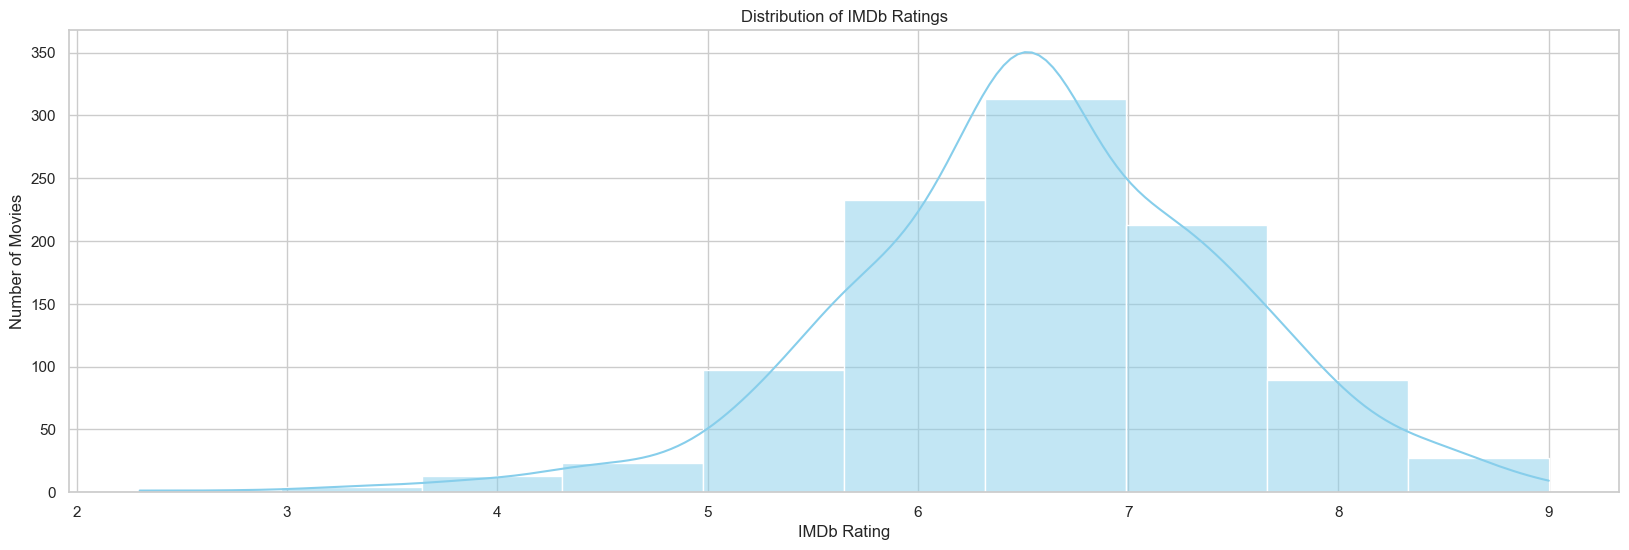

In [154]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.histplot(df['imdb'].sort_values() , bins=10, kde=True, color="skyblue")


plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Movies')
plt.savefig('IMDB-Histogram', dpi=300)
plt.show()


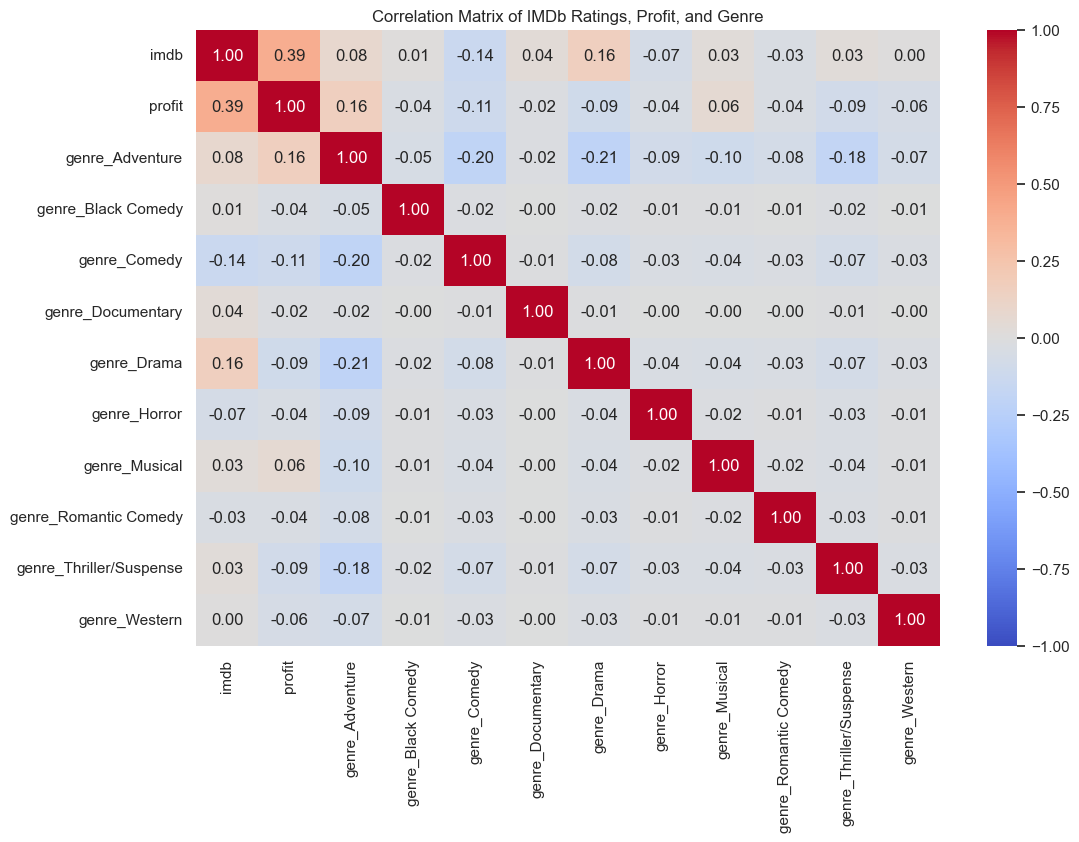

In [ ]:
df['profit'] = df['worldwide_gross'] - df['Budget']


df_encoded = pd.get_dummies(df, columns=['genre'], drop_first=True)  # Dropping first to avoid multicollinearity

correlation_data = df_encoded[['imdb', 'profit'] + [col for col in df_encoded.columns if 'genre_' in col]]

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of IMDb Ratings, Profit, and Genre')
plt.savefig('Correlation Matrix', dpi=300)
plt.show()


In [ ]:
# for x in ['source', 'production_company','production_country','director','production_method','genre','language','best_performed']:
#     df.loc[:,[x]] = df.loc[:,[x]].fillna('unkown')